In [1]:
import pandas as pd
import re

In [2]:
import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk import FreqDist
nltk.download('stopwords')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import wordcloud
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.corpus import stopwords, wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonih\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sonih\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
dataset = pd.read_csv("Final_Dataset.csv")
dataset.head()

,Unnamed: 0,Unnamed: 0.1,Review,Ratings,Date
0,0,0,Booked 3 rooms for a family staycation but sad...,1,Dec 2020
1,1,1,We booked a Bay Suite for family of 5 with a s...,5,Dec 2020
2,2,2,World Class Service! Highly recommended for an...,5,Dec 2020
3,3,3,Our family of 2 adults and 2 kids had a thoro...,4,Dec 2020
4,4,4,If you are looking for an unforgettable stayca...,5,Dec 2020


In [4]:
print(dataset.describe().transpose())

                count         mean          std  min      25%     50%  \
Unnamed: 0    11450.0  5724.500000  3305.474626  0.0  2862.25  5724.5   
Unnamed: 0.1  11450.0  5724.500000  3305.474626  0.0  2862.25  5724.5   
Ratings       11450.0     4.327249     1.003131  1.0     4.00     5.0   

                  75%      max  
Unnamed: 0    8586.75  11449.0  
Unnamed: 0.1  8586.75  11449.0  
Ratings          5.00      5.0  


In [5]:
dataset.isna().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Review          0
Ratings         0
Date            0
dtype: int64

In [6]:
dataset.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
dataset.head()

,Review,Ratings,Date
0,Booked 3 rooms for a family staycation but sad...,1,Dec 2020
1,We booked a Bay Suite for family of 5 with a s...,5,Dec 2020
2,World Class Service! Highly recommended for an...,5,Dec 2020
3,Our family of 2 adults and 2 kids had a thoro...,4,Dec 2020
4,If you are looking for an unforgettable stayca...,5,Dec 2020


In [7]:
# get frequency of words

def frequencyOfWords(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

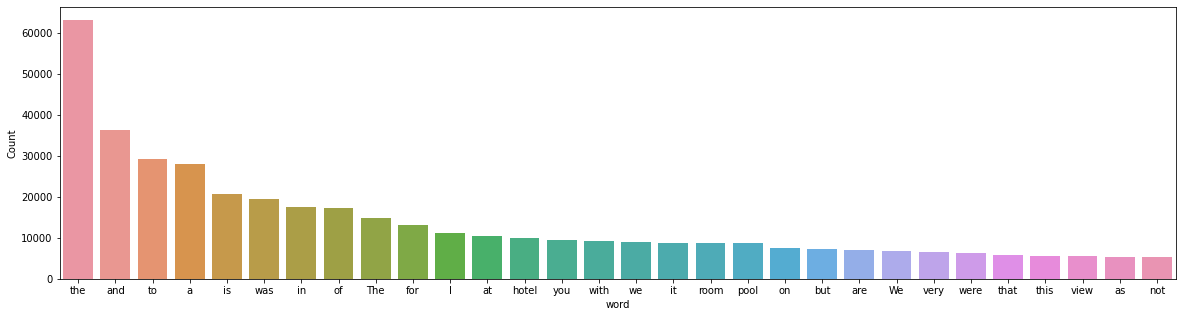

In [8]:
frequencyOfWords(dataset['Review'])

In [9]:
dataset1 = dataset.copy()
dataset1['Review'] = dataset1['Review'].apply(str)
dataset1['ReviewLength'] = dataset1['Review'].apply(lambda w : len(re.findall(r'\w+', w)))
dataset1.head()

,Review,Ratings,Date,ReviewLength
0,Booked 3 rooms for a family staycation but sad...,1,Dec 2020,341
1,We booked a Bay Suite for family of 5 with a s...,5,Dec 2020,171
2,World Class Service! Highly recommended for an...,5,Dec 2020,193
3,Our family of 2 adults and 2 kids had a thoro...,4,Dec 2020,129
4,If you are looking for an unforgettable stayca...,5,Dec 2020,149


In [10]:
dataset1['ReviewLength'].describe()

count    11450.000000
mean        98.702533
std         42.787667
min         16.000000
25%         57.000000
50%         97.000000
75%        144.000000
max        341.000000
Name: ReviewLength, dtype: float64

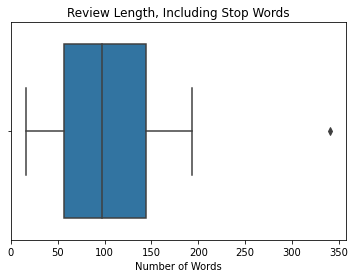

In [11]:
sns.boxplot(data = dataset1, x = "ReviewLength")
plt.xlabel('Number of Words')
plt.title('Review Length, Including Stop Words')
plt.show()

c:\users\sonih\anaconda3\envs\p39\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


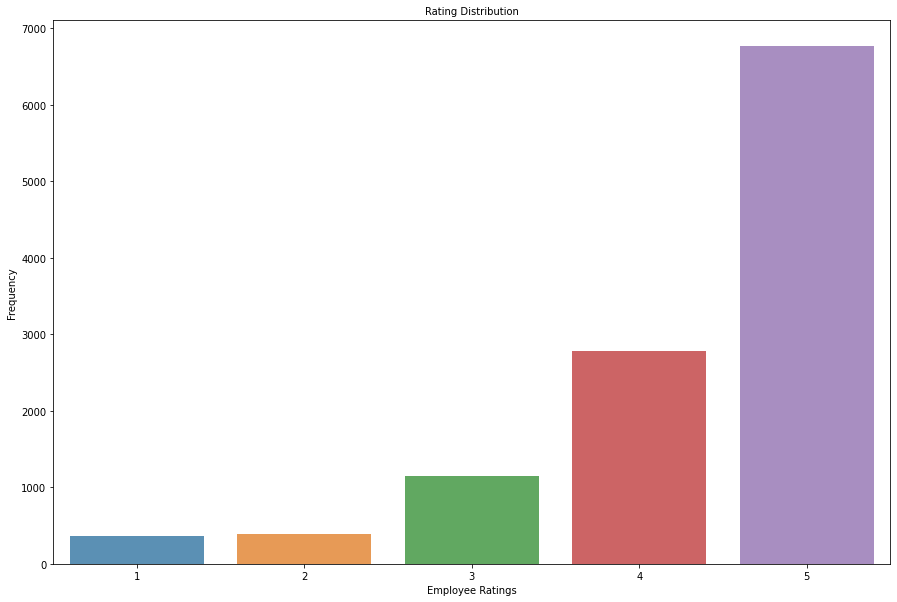

In [12]:
x_rating = dataset.Ratings.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Employee Ratings', fontsize=10)
plt.xticks(fontsize=10)
plt.show()

In [13]:
dataset.head()

,Review,Ratings,Date
0,Booked 3 rooms for a family staycation but sad...,1,Dec 2020
1,We booked a Bay Suite for family of 5 with a s...,5,Dec 2020
2,World Class Service! Highly recommended for an...,5,Dec 2020
3,Our family of 2 adults and 2 kids had a thoro...,4,Dec 2020
4,If you are looking for an unforgettable stayca...,5,Dec 2020


In [14]:
dataset1['Rating_Polartity'] = dataset1['Ratings'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x==3 else 'Negative'))

dataset1.head()

,Review,Ratings,Date,ReviewLength,Rating_Polartity
0,Booked 3 rooms for a family staycation but sad...,1,Dec 2020,341,Negative
1,We booked a Bay Suite for family of 5 with a s...,5,Dec 2020,171,Positive
2,World Class Service! Highly recommended for an...,5,Dec 2020,193,Positive
3,Our family of 2 adults and 2 kids had a thoro...,4,Dec 2020,129,Positive
4,If you are looking for an unforgettable stayca...,5,Dec 2020,149,Positive


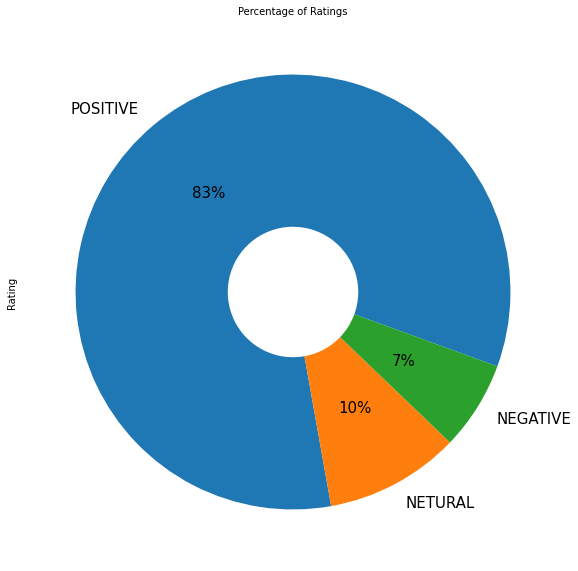

In [15]:
plt.figure(figsize=(20,10))
plt.title('Percentage of Ratings', fontsize=10)
dataset1.Rating_Polartity.value_counts().plot(kind='pie', labels=['POSITIVE','NETURAL','NEGATIVE'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})
plt.ylabel("Rating",fontsize=10)
plt.show()

In [16]:
dataset.drop(['Ratings','Date'], axis=1, inplace=True)
dataset.head()

,Review
0,Booked 3 rooms for a family staycation but sad...
1,We booked a Bay Suite for family of 5 with a s...
2,World Class Service! Highly recommended for an...
3,Our family of 2 adults and 2 kids had a thoro...
4,If you are looking for an unforgettable stayca...


In [17]:
hotel_df = dataset.copy()
stop_words = stopwords.words("english")

In [18]:
def cleanReviews(s):
    s = s.lower()                   
    s = re.sub(r'[^\w\s]', ' ', s)  
    s = re.sub(r'[\d+]', ' ', s)    
    s = s.strip()                   
    s = re.sub(' +', ' ', s)        
    return s

In [19]:
hotel_df["Review"] = hotel_df["Review"].apply(lambda x: cleanReviews(x))

In [20]:
hotel_df.head(10)

,Review
0,booked rooms for a family staycation but sadly...
1,we booked a bay suite for family of with a sea...
2,world class service highly recommended for any...
3,our family of adults and kids had a thoroughly...
4,if you are looking for an unforgettable stayca...
5,i had a great staycation to celebrate my anniv...
6,booked a room to celebrate my friend s birthda...
7,staycation was great with beautiful harbour vi...
8,it s been a few years since i last stayed at t...
9,i would to extend my compliment to ms catherin...


In [21]:
hotel_df["Review"] = hotel_df["Review"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [22]:
hotel_df["Review"][0]

'booked rooms family staycation sadly forgettable experience checking took close hour one room subsequently told room keys left room ready family members reached registering two front office agents mentioned no thing leaving room keys room wrong info throughout tried book slots infinity pool system full bugs eventually could not secure slots told front office agent trying book oct system went live first implementation thus lot bugs managed get slot end staffs poorly trained wanted visit sky park directed bridge heading towards gardens bay checking never informed breakfast call ask breakfast rise cafe poor signal one staff wanted order food acknowledged never came back wait vain no one bothers take order checking never informed person booking room present apply sands membership lifestyle card end make multiple trips apply wasted almost half day admin stuffs poorly managed processes very lousy communication never informed baby cot reserved way ahead front office agent told check availabi

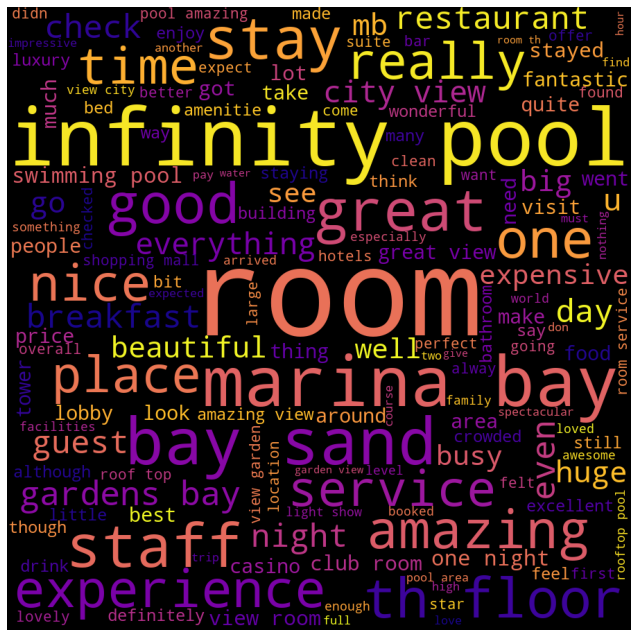

In [23]:
reviews = pd.Series(hotel_df["Review"].tolist()).astype(str)
plt.figure(figsize = (9, 9))
rev_wcloud_all = wordcloud.WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(''.join(reviews))
plt.imshow(rev_wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

In [24]:
import textblob            
from textblob import TextBlob

In [25]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [26]:
hotel_df['Review']=hotel_df['Review'].apply(str)

In [27]:
tokenizer = RegexpTokenizer(r'\w+')
hotel_df["Reviews_Token"] = hotel_df["Review"].apply(lambda x: tokenizer.tokenize(x))

In [28]:
lemm = WordNetLemmatizer()

In [29]:
def toWordNet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatizeText(text):
    nltk_tagged = nltk.pos_tag(text)
    wordnet_tagged = map(lambda x: (x[0], toWordNet(x[1])), nltk_tagged)
    lemm_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemm_sentence.append(word)
        else:
            lemm_sentence.append(lemm.lemmatize(word, tag))
    return lemm_sentence

In [30]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sonih\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [31]:
hotel_df["Reviews_Lemm"] = hotel_df["Reviews_Token"].apply(lambda x: lemmatizeText(x))

In [32]:
hotel_df[["Reviews_Token", "Reviews_Lemm"]].sample(14)

,Reviews_Token,Reviews_Lemm
5566,"[family, first, time, try, remarkable, very, f...","[family, first, time, try, remarkable, very, f..."
9758,"[check, mbs, orchid, suite, room, spacious, cl...","[check, mb, orchid, suite, room, spacious, cle..."
6911,"[stayed, nights, great, time, well, located, p...","[stayed, night, great, time, well, locate, poo..."
897,"[no, mistaking, iconic, question, ask, whether...","[no, mistake, iconic, question, ask, whether, ..."
3662,"[obviously, chose, pool, basically, holy, grai...","[obviously, chose, pool, basically, holy, grai..."
6522,"[first, time, stay, iconic, wow, not, disappoi...","[first, time, stay, iconic, wow, not, disappoi..."
6507,"[thought, extraordinary, room, th, floor, view...","[think, extraordinary, room, th, floor, view, ..."
9700,"[staying, month, may, along, family, not, care...","[stay, month, may, along, family, not, care, h..."
2832,"[marina, bay, sands, literally, best, swimming...","[marina, bay, sand, literally, best, swim, poo..."
345,"[marina, bay, sands, beautiful, roof, top, sky...","[marina, bay, sand, beautiful, roof, top, sky,..."


In [33]:
import itertools
import collections

In [34]:
review_list = list(itertools.chain.from_iterable(hotel_df['Reviews_Lemm']))
rev_word_freq = collections.Counter(review_list)

word_freq_DF = pd.DataFrame(rev_word_freq.most_common(15), columns=['Words', 'Count'])
word_freq_DF.head()

,Words,Count
0,room,15080
1,pool,12145
2,view,10241
3,stay,8967
4,very,7162


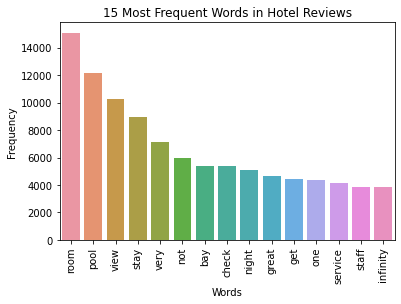

In [35]:
sns.barplot(data = word_freq_DF, x = "Words", y = "Count")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.title("15 Most Frequent Words in Hotel Reviews")
plt.show()

## Sentiment Analysis

In [36]:
hotel_df["Sentiment_TextBlob"] = hotel_df["Review"].apply(lambda x: TextBlob(x).sentiment[0])

In [37]:
hotel_df[["Review", "Sentiment_TextBlob"]].head(10)

,Review,Sentiment_TextBlob
0,booked rooms family staycation sadly forgettab...,-0.131515
1,booked bay suite family seamless booking proce...,0.225620
2,world class service highly recommended anyone ...,0.275350
3,family adults kids thoroughly enjoyable stayca...,0.137662
4,looking unforgettable staycation experience pl...,0.299238
5,great staycation celebrate anniversary alice p...,0.430000
6,booked room celebrate friend birthday wrote ea...,0.495833
7,staycation great beautiful harbour view room c...,0.323958
8,years since last stayed mbs remains fun enjoya...,0.393939
9,would extend compliment ms catherine pool atte...,0.266667


In [38]:
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [39]:
senti = SentimentIntensityAnalyzer()
hotel_df["Sentiment_VADER"] = hotel_df["Review"].apply(lambda x: senti.polarity_scores(x)['compound'])

In [40]:
hotel_df[["Review", "Sentiment_VADER", "Sentiment_TextBlob"]].head(10)

,Review,Sentiment_VADER,Sentiment_TextBlob
0,booked rooms family staycation sadly forgettab...,-0.9715,-0.131515
1,booked bay suite family seamless booking proce...,0.9876,0.225620
2,world class service highly recommended anyone ...,0.9937,0.275350
3,family adults kids thoroughly enjoyable stayca...,0.7089,0.137662
4,looking unforgettable staycation experience pl...,0.9858,0.299238
5,great staycation celebrate anniversary alice p...,0.9865,0.430000
6,booked room celebrate friend birthday wrote ea...,0.9870,0.495833
7,staycation great beautiful harbour view room c...,0.9594,0.323958
8,years since last stayed mbs remains fun enjoya...,0.9646,0.393939
9,would extend compliment ms catherine pool atte...,0.8910,0.266667


In [41]:
hotel_df[["Review", "Sentiment_VADER"]][hotel_df["Sentiment_VADER"] < -0.1]

,Review,Sentiment_VADER
0,booked rooms family staycation sadly forgettab...,-0.9715
11,book premier twin city view room adults childr...,-0.4537
15,firstly may one time thing got room noisy frid...,-0.6631
38,not first stay mbs definitely problem staff co...,-0.7184
45,dont recommend visiting marina bay sands momen...,-0.6926
...,...,...
11362,pool views rooms fantastic no one deny however...,-0.5368
11365,bedroom small n facilities standard comparing ...,-0.1808
11412,decided staycation mbs don luxury time travel ...,-0.5754
11442,air conditioner flow very poor first room allo...,-0.5983


c:\users\sonih\anaconda3\envs\p39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


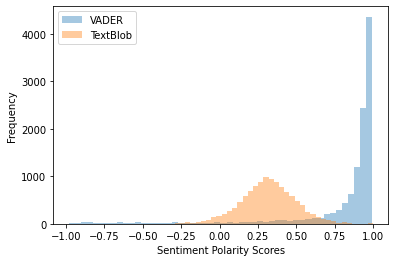

In [42]:
sns.distplot(hotel_df["Sentiment_VADER"], kde = False, label = "VADER")
sns.distplot(hotel_df["Sentiment_TextBlob"], kde = False, label = "TextBlob")
plt.xlabel("Sentiment Polarity Scores")
plt.ylabel("Frequency")
plt.legend()
plt.show()

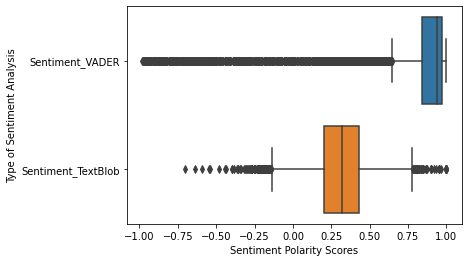

In [43]:
sns.boxplot(data = pd.melt(hotel_df[["Sentiment_VADER", "Sentiment_TextBlob"]]), x = "value", y = "variable")
plt.xlabel("Sentiment Polarity Scores")
plt.ylabel("Type of Sentiment Analysis")
plt.show()

In [44]:
positiveReviews = hotel_df[["Review","Reviews_Lemm","Sentiment_TextBlob"]][hotel_df["Sentiment_TextBlob"] == hotel_df["Sentiment_TextBlob"].max()]

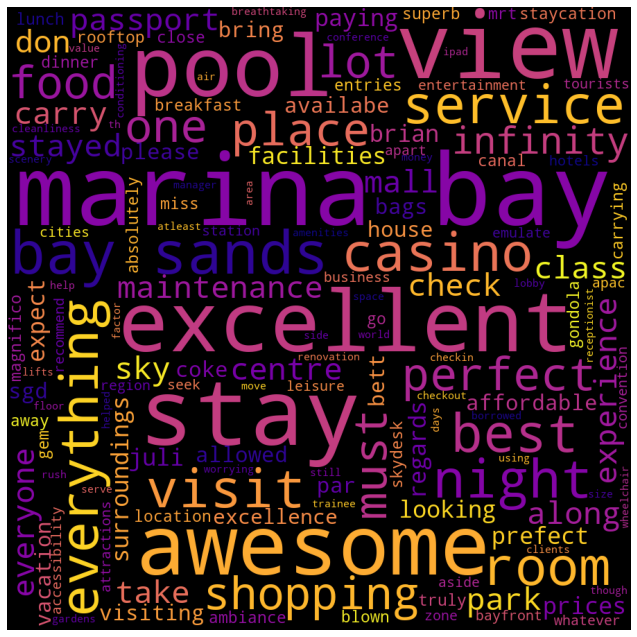

In [45]:
plt.figure(figsize = (9, 9))
wcloudPositiveReviews = wordcloud.WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(positiveReviews["Review"].tolist()).astype(str)))
plt.imshow(wcloudPositiveReviews)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

In [46]:
positiveReviewsVADER = hotel_df[["Review","Reviews_Lemm","Sentiment_VADER"]][hotel_df["Sentiment_VADER"] > 0.8]

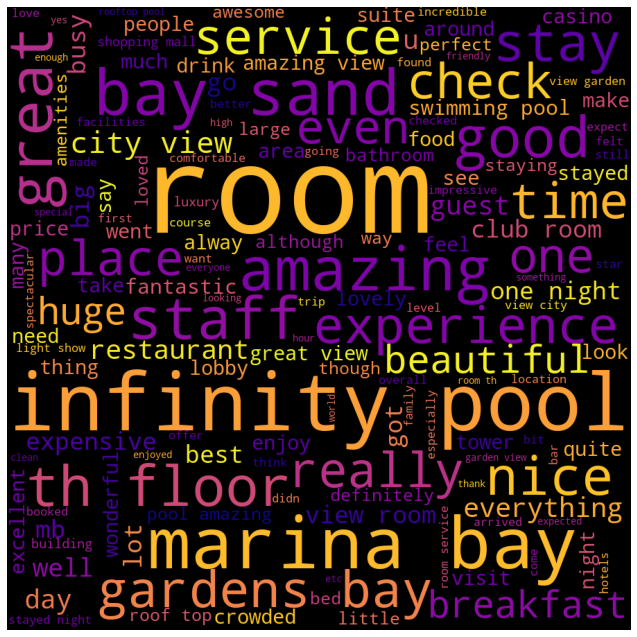

In [47]:
plt.figure(figsize = (9, 9))
wcloudPositiveReviewsVADER = wordcloud.WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(positiveReviewsVADER["Review"].tolist()).astype(str)))
plt.imshow(wcloudPositiveReviewsVADER)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

In [48]:
negativeReviews = hotel_df[["Review","Reviews_Lemm","Sentiment_TextBlob"]][hotel_df["Sentiment_TextBlob"] < -0.0]

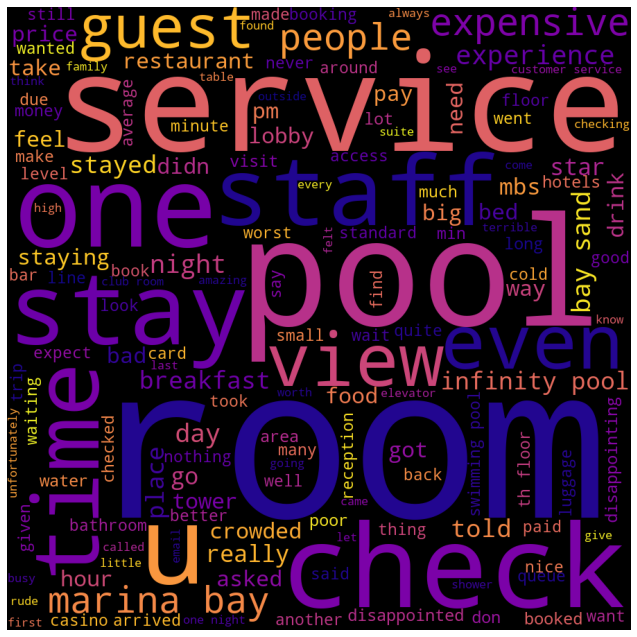

In [49]:
plt.figure(figsize = (9, 9))
wcloudNegativeReviews = wordcloud.WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(negativeReviews["Review"].tolist()).astype(str)))
plt.imshow(wcloudNegativeReviews)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

In [50]:
negativeReviewsVADER = hotel_df[["Review","Reviews_Lemm","Sentiment_VADER"]][hotel_df["Sentiment_VADER"] < -0.1]

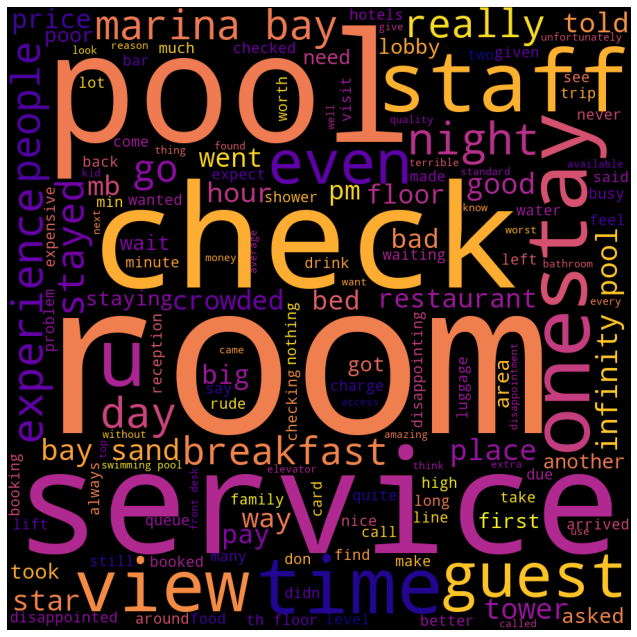

In [51]:
plt.figure(figsize = (9, 9))
wcloudNegativeReviewsVADER = wordcloud.WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(negativeReviewsVADER["Review"].tolist()).astype(str)))
plt.imshow(wcloudNegativeReviewsVADER)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

In [52]:
hotel_df["Bigrams"] = hotel_df["Reviews_Lemm"].apply(lambda x: list(ngrams(x, 2)))

In [53]:
hotel_df.head()

,Review,Reviews_Token,Reviews_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams
0,booked rooms family staycation sadly forgettab...,"[booked, rooms, family, staycation, sadly, for...","[book, room, family, staycation, sadly, forget...",-0.131515,-0.9715,"[(book, room), (room, family), (family, stayca..."
1,booked bay suite family seamless booking proce...,"[booked, bay, suite, family, seamless, booking...","[book, bay, suite, family, seamless, book, pro...",0.225620,0.9876,"[(book, bay), (bay, suite), (suite, family), (..."
2,world class service highly recommended anyone ...,"[world, class, service, highly, recommended, a...","[world, class, service, highly, recommend, any...",0.275350,0.9937,"[(world, class), (class, service), (service, h..."
3,family adults kids thoroughly enjoyable stayca...,"[family, adults, kids, thoroughly, enjoyable, ...","[family, adult, kid, thoroughly, enjoyable, st...",0.137662,0.7089,"[(family, adult), (adult, kid), (kid, thorough..."
4,looking unforgettable staycation experience pl...,"[looking, unforgettable, staycation, experienc...","[look, unforgettable, staycation, experience, ...",0.299238,0.9858,"[(look, unforgettable), (unforgettable, stayca..."


In [54]:
bigrams_list = list(itertools.chain.from_iterable(hotel_df['Bigrams']))
bigrams_freq = collections.Counter(bigrams_list)

bigrams_freq_DF = pd.DataFrame(bigrams_freq.most_common(30), columns=['Bigrams', 'Count'])
bigrams_freq_DF

,Bigrams,Count
0,"(infinity, pool)",3704
1,"(marina, bay)",3055
2,"(bay, sand)",2373
3,"(th, floor)",1649
4,"(garden, bay)",1627
5,"(city, view)",1044
6,"(view, room)",983
7,"(one, night)",910
8,"(swim, pool)",851
9,"(club, room)",820


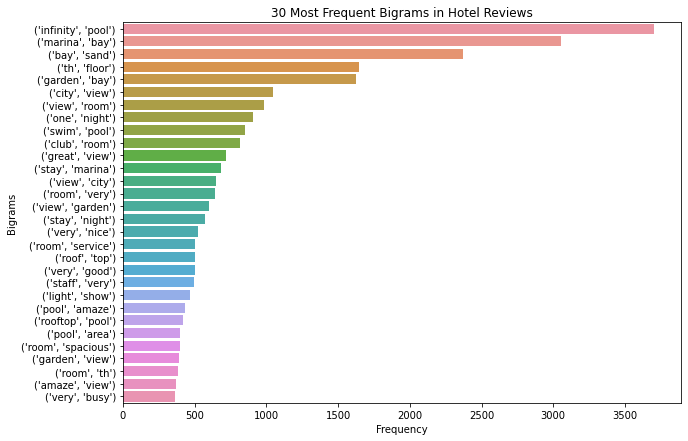

In [56]:
plt.figure(figsize = (10,7))
sns.barplot(data = bigrams_freq_DF, x = "Count", y = "Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("30 Most Frequent Bigrams in Hotel Reviews")
plt.show()

In [57]:
hotel_df["Trigrams"] = hotel_df["Reviews_Lemm"].apply(lambda x: list(ngrams(x, 3)))

In [58]:
hotel_df

,Review,Reviews_Token,Reviews_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams,Trigrams
0,booked rooms family staycation sadly forgettab...,"[booked, rooms, family, staycation, sadly, for...","[book, room, family, staycation, sadly, forget...",-0.131515,-0.9715,"[(book, room), (room, family), (family, stayca...","[(book, room, family), (room, family, staycati..."
1,booked bay suite family seamless booking proce...,"[booked, bay, suite, family, seamless, booking...","[book, bay, suite, family, seamless, book, pro...",0.225620,0.9876,"[(book, bay), (bay, suite), (suite, family), (...","[(book, bay, suite), (bay, suite, family), (su..."
2,world class service highly recommended anyone ...,"[world, class, service, highly, recommended, a...","[world, class, service, highly, recommend, any...",0.275350,0.9937,"[(world, class), (class, service), (service, h...","[(world, class, service), (class, service, hig..."
3,family adults kids thoroughly enjoyable stayca...,"[family, adults, kids, thoroughly, enjoyable, ...","[family, adult, kid, thoroughly, enjoyable, st...",0.137662,0.7089,"[(family, adult), (adult, kid), (kid, thorough...","[(family, adult, kid), (adult, kid, thoroughly..."
4,looking unforgettable staycation experience pl...,"[looking, unforgettable, staycation, experienc...","[look, unforgettable, staycation, experience, ...",0.299238,0.9858,"[(look, unforgettable), (unforgettable, stayca...","[(look, unforgettable, staycation), (unforgett..."
...,...,...,...,...,...,...,...
11445,although not cheap excellent service spacious ...,"[although, not, cheap, excellent, service, spa...","[although, not, cheap, excellent, service, spa...",0.322756,0.9146,"[(although, not), (not, cheap), (cheap, excell...","[(although, not, cheap), (not, cheap, excellen..."
11446,checked conference offered room lower floor nd...,"[checked, conference, offered, room, lower, fl...","[check, conference, offer, room, lower, floor,...",0.143333,0.5030,"[(check, conference), (conference, offer), (of...","[(check, conference, offer), (conference, offe..."
11447,shopping centre waste time take venetian las v...,"[shopping, centre, waste, time, take, venetian...","[shopping, centre, waste, time, take, venetian...",0.240152,0.5574,"[(shopping, centre), (centre, waste), (waste, ...","[(shopping, centre, waste), (centre, waste, ti..."
11448,kids insisted staying mbs mainly due infinity ...,"[kids, insisted, staying, mbs, mainly, due, in...","[kid, insist, stay, mb, mainly, due, infinity,...",0.110714,0.8491,"[(kid, insist), (insist, stay), (stay, mb), (m...","[(kid, insist, stay), (insist, stay, mb), (sta..."


In [59]:
trigrams_list = list(itertools.chain.from_iterable(hotel_df["Trigrams"]))
trigrams_freq = collections.Counter(trigrams_list)

trigrams_freq_DF = pd.DataFrame(trigrams_freq.most_common(40), columns=['Trigrams', 'Count'])
trigrams_freq_DF.head()

,Trigrams,Count
0,"(marina, bay, sand)",2351
1,"(stay, marina, bay)",662
2,"(view, garden, bay)",392
3,"(room, th, floor)",375
4,"(city, view, room)",294


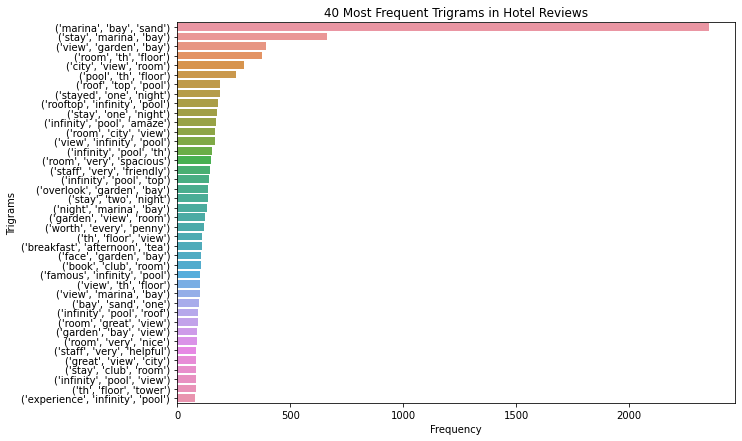

In [60]:
plt.figure(figsize = (10,7))
sns.barplot(data = trigrams_freq_DF, x = "Count", y = "Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("40 Most Frequent Trigrams in Hotel Reviews")
plt.show()

In [61]:
hotel_df[["Sentiment_TextBlob", "Sentiment_VADER"]].describe()

,Sentiment_TextBlob,Sentiment_VADER
count,11450.000000,11450.000000
mean,0.317283,0.807728
std,0.181315,0.350680
min,-0.700000,-0.984100
25%,0.204775,0.840200
50%,0.317778,0.939300
75%,0.434000,0.970500
max,1.000000,0.996200


In [62]:
def sentiment_result(polarity):
    if polarity >= 0.1:
        return "Postive"
    elif polarity <= -0.1:
        return "Negative"
    else:
        return "Neutral"

In [63]:
hotel_df["Label"] = hotel_df["Sentiment_VADER"].apply(lambda x: sentiment_result(x))

In [64]:
hotel_df["Label"].value_counts()

Postive     10796
Negative      522
Neutral       132
Name: Label, dtype: int64

In [65]:
hotel_df.head()

,Review,Reviews_Token,Reviews_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams,Trigrams,Label
0,booked rooms family staycation sadly forgettab...,"[booked, rooms, family, staycation, sadly, for...","[book, room, family, staycation, sadly, forget...",-0.131515,-0.9715,"[(book, room), (room, family), (family, stayca...","[(book, room, family), (room, family, staycati...",Negative
1,booked bay suite family seamless booking proce...,"[booked, bay, suite, family, seamless, booking...","[book, bay, suite, family, seamless, book, pro...",0.225620,0.9876,"[(book, bay), (bay, suite), (suite, family), (...","[(book, bay, suite), (bay, suite, family), (su...",Postive
2,world class service highly recommended anyone ...,"[world, class, service, highly, recommended, a...","[world, class, service, highly, recommend, any...",0.275350,0.9937,"[(world, class), (class, service), (service, h...","[(world, class, service), (class, service, hig...",Postive
3,family adults kids thoroughly enjoyable stayca...,"[family, adults, kids, thoroughly, enjoyable, ...","[family, adult, kid, thoroughly, enjoyable, st...",0.137662,0.7089,"[(family, adult), (adult, kid), (kid, thorough...","[(family, adult, kid), (adult, kid, thoroughly...",Postive
4,looking unforgettable staycation experience pl...,"[looking, unforgettable, staycation, experienc...","[look, unforgettable, staycation, experience, ...",0.299238,0.9858,"[(look, unforgettable), (unforgettable, stayca...","[(look, unforgettable, staycation), (unforgett...",Postive
